<a href="https://colab.research.google.com/github/dawoodrehman44/Introduction-to-Python/blob/main/%E5%8A%A9%E6%95%99%E8%AA%B2%E7%A8%8B_%E7%AC%AC%E4%B8%80%E5%91%A8_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab-Link: https://from.ann.center/week1_PCA**
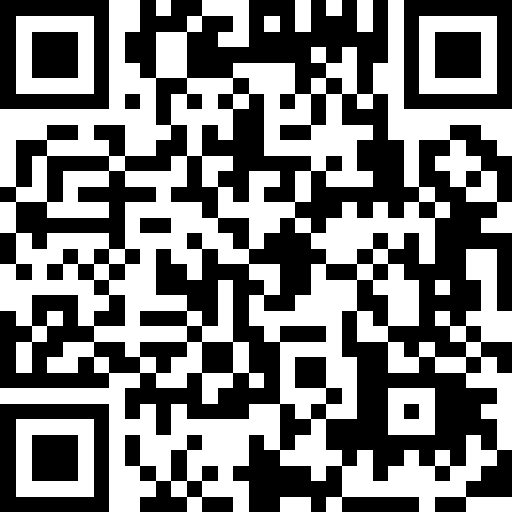

In [ ]:
!pip install trimesh
!pip install ipympl
# Ctrl+M. Restart Kernel

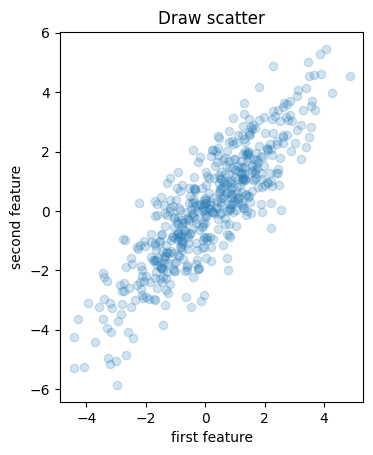

In [ ]:
# Step1 繪製 2D 散點圖數據(橢圓形)
# Step1 Draw 2D scatter plot data (ellipse)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
#%matplotlib widget
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label="samples")
plt.gca().set(
    aspect="equal",
    title="Draw scatter",
    xlabel="first feature",
    ylabel="second feature",
)
plt.show()

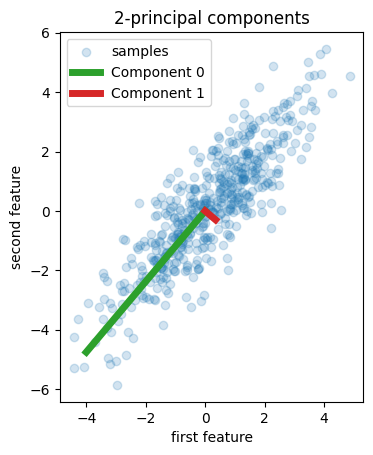

In [ ]:
# Step2 使用 PCA 繪製主成分
# Step2 Use PCA to draw principal components
#%matplotlib widget
%matplotlib inline
# n_components: Number of components to keep.
pca = PCA(n_components=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
#         [0, comp[0]/((np.max(X[:,0])-np.min(X[:,0]))/4)],
#         [0, comp[1]/((np.max(X[:,1])-np.min(X[:,1]))/4)],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

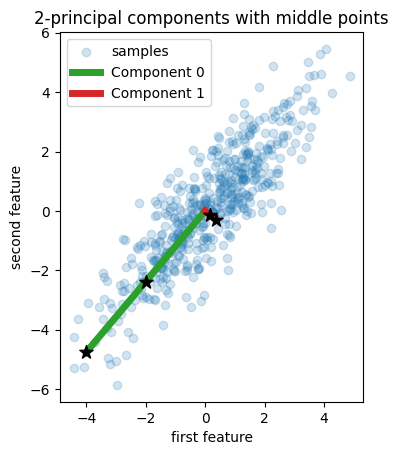

(array([[-2.0004432 , -2.37624629],
        [ 0.17573083, -0.14793902]]),
 array([[-4.00088641, -4.75249258],
        [ 0.35146166, -0.29587804]]))

In [ ]:
# ===================================2023/11/28 補充: pca.components_ 就是方向向量，我們將方向向量上任一兩個點繪製在主軸上，呈現如下圖。===================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generating the dataset
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)

# Applying PCA
pca = PCA(n_components=2).fit(X)

# Calculating the direction vectors
direction_vectors = pca.components_ * pca.explained_variance_[:, np.newaxis]

# Calculating the middle points on each principal axis
middle_points = direction_vectors / 2

# Plotting the data and principal components
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
    # Marking middle points on the principal axes
    plt.scatter(middle_points[i, 0], middle_points[i, 1], marker='*', color='black', s=100, zorder=3)
    # Marking points on the principal axes
    plt.scatter(comp[0], comp[1], marker='*', color='black', s=100, zorder=3)
# Setting plot characteristics
plt.gca().set(
    aspect="equal",
    title="2-principal components with middle points",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()
end_points = direction_vectors
middle_points, end_points


In [ ]:
# Step3_0 準備/下載 3D 散點圖數據
# Step3_0 Prepare/download 3D scatter plot dataset
import trimesh
import tensorflow as tf
import os
# 第一次使用需要下載點雲圖
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

In [ ]:
# Step3_1 查看有多少可使用 3D 圖片
src_files = os.listdir(DATA_DIR)
del_list = []
for i in range(len(src_files)):
    if os.path.isfile(DATA_DIR+'/'+src_files[i])==True:
        del_list.append(i)
del_list= np.array(del_list)
for i in range(len(del_list)):
    del src_files[del_list[i]]
    del_list = del_list-1
print('Number of 3D images: ',len(src_files))
for i in range(len(src_files)):
    src_files[i]=src_files[i]+'/train/'+src_files[i]+'_0001.off'
print('You can copy these paths: ',src_files)

Number of 3D images:  10
You can copy these paths:  ['monitor/train/monitor_0001.off', 'desk/train/desk_0001.off', 'table/train/table_0001.off', 'sofa/train/sofa_0001.off', 'dresser/train/dresser_0001.off', 'night_stand/train/night_stand_0001.off', 'bed/train/bed_0001.off', 'chair/train/chair_0001.off', 'toilet/train/toilet_0001.off', 'bathtub/train/bathtub_0001.off']


In [ ]:
# Step3_2 顯示3D Mesh圖
# Step3_2 Display 3D Mesh file
# you can directly use:  src_files[0] or src_files[1]....src_files[9]
File = src_files[0]# ==================更改此處============
# 可以再更改此類別中的編號
File = File[:-5]+'6.off'
mesh = trimesh.load(os.path.join(DATA_DIR, File))
mesh.show()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

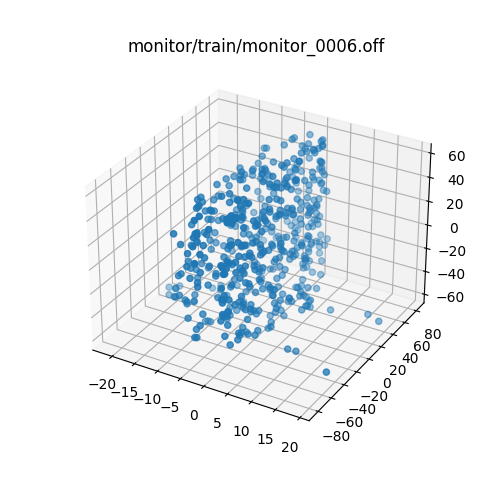

In [ ]:
# Step3_3 從3D圖中隨機採樣取座標點
# Step3_3 Randomly sample coordinate points from the 3D image
%matplotlib widget
points = mesh.sample(500)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
#ax.set_axis_off()
plt.gca().set(
    title=File,
)
plt.show()

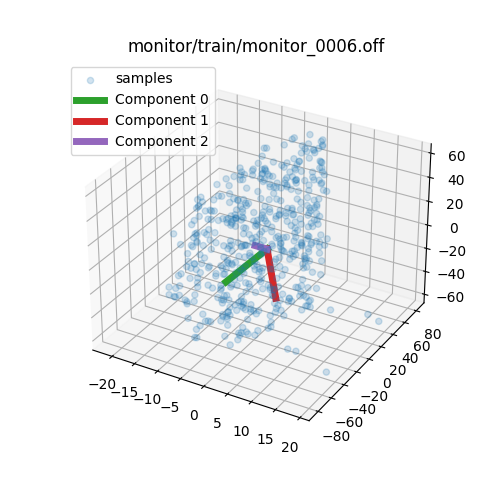

In [ ]:
# Step4 使用 PCA 繪製主成分
# Step4 Use PCA to draw principal components
%matplotlib widget
# n_components: Number of components to keep.
pca = PCA(n_components=3).fit(points)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.2, label="samples")
#plt.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.2, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    ax.plot(
        [0, comp[0]/((np.max(points[:,0])-np.min(points[:,0]))/4)],
        [0, comp[1]/((np.max(points[:,1])-np.min(points[:,1]))/4)],
        [0, comp[2]/((np.max(points[:,2])-np.min(points[:,2]))/4)],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title=File,
)
plt.legend()
plt.show()

In [ ]:
# Step5 自定義20個座標
# Step5 Customize 20 coordinates
globals()['coordinate_1']= [0,0,0]
coordinate_2 = [2,2,2]
coordinate_3 = [1,0,0]
coordinate_4 = [4,4,4]
coordinate_5 = [5,7,9]
coordinate_6 = [4,4,3]
coordinate_7 = [6,6,6]
coordinate_8 = [9,10,12]
coordinate_9 = [9,11,5]
coordinate_10 = [5,5,5]
coordinate_11 = [8,8,8]
coordinate_12 = [10,10,10]
coordinate_13 = [7,8,7]
coordinate_14 = [9,7,9]
coordinate_15 = [10,11,10]
coordinate_16 = [12,12,12]
coordinate_17 = [11,7,10]
coordinate_18 = [9,9,10]
coordinate_19 = [14,14,14]
coordinate_20 = [16,16,16]
# 將20的座標添加入 points
points = []
for i in range(1,21):
    points.append(globals()['coordinate_'+str(i)])
points = np.array(points)
points.shape

(20, 3)

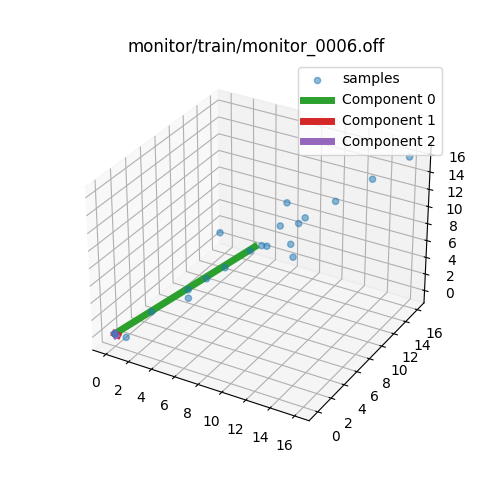

In [ ]:
# Step6 使用 PCA 繪製主成分
# Step6 Use PCA to draw principal components
%matplotlib widget
pca = PCA(n_components=3).fit(points)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.5, label="samples")
#plt.scatter(points[:, 0], points[:, 1], points[:, 2], alpha=0.2, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    ax.plot(
        [0, comp[0]/((np.max(points[:,0])-np.min(points[:,0]))/4)],
        [0, comp[1]/((np.max(points[:,1])-np.min(points[:,1]))/4)],
        [0, comp[2]/((np.max(points[:,2])-np.min(points[:,2]))/4)],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title=File,
)
plt.legend()
plt.show()

Homework
https://drive.google.com/file/d/1RKg2FxH5xyUtNHlrVEOEXK6Ita4fxj-B/view?usp=sharing
